In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)
# Read the ride data file and stor it in a pandas DF
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [4]:
# Find the number of items in each row that isn't a header
print(len(city_data_df))
print(len(ride_data_df))

120
2375


In [5]:
# Get the columns and the rows that are not null for city_data
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the unique values of the cities
city_data_df['city'].unique()

array(['Richardfort', 'Williamsstad', 'Port Angela', 'Rodneyfort',
       'West Robert', 'West Anthony', 'West Angela', 'Martinezhaven',
       'Karenberg', 'Barajasview', 'Robertport', 'Joneschester',
       'Leahton', 'West Christopherberg', 'Johnton', 'Reynoldsfurt',
       'Port David', 'New Kimberlyborough', 'Carriemouth', 'Rogerston',
       'Jerryton', 'Loganberg', 'Simpsonburgh', 'Port Frank',
       'South Latoya', 'West Samuelburgh', 'Grahamburgh',
       'West Patrickchester', 'North Madeline', 'South Jack', 'Liumouth',
       'West Ericstad', 'Royland', 'Erikaland', 'Huntermouth',
       'Justinberg', 'South Evanton', 'Lake Danielberg',
       'East Kaylahaven', 'West Heidi', 'Karenside', 'South Karenland',
       'West Gabriel', 'North Markport', 'Raymondhaven', 'North Barbara',
       'Lake Scottton', 'West Josephberg', 'Pattyland',
       'South Michelleport', 'Christopherfurt', 'Valentineton',
       'South Phillip', 'North Jason', 'Deanville', 'Lake Jonathanshire',
   

In [10]:
# There are x number of different cities
print(len(city_data_df['city'].unique()))

120


In [11]:
# Get the unique values of the driver count
city_data_df['driver_count'].unique()

array([38, 59, 67, 34, 39, 70, 48, 25, 22, 26, 12, 17, 32, 27,  7, 33, 52,
       64, 23, 21, 10, 73, 61, 19, 46, 69, 37, 11, 65, 28,  5,  4, 57, 18,
       58, 45, 72, 41,  6, 49, 44, 36,  3, 50, 47,  2, 20, 16,  1, 14,  8,
        9], dtype=int64)

In [12]:
# There are x number of different driver counts
print(len(city_data_df['driver_count'].unique()))

52


In [13]:
# Get the number of times the value 'Urban' appears in city data
print(sum(city_data_df["type"]=="Urban"), sum(city_data_df["type"]=="Suburban"), sum(city_data_df["type"]=="Rural"))
print(66+36+18)

66 36 18
120


In [14]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [17]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [18]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12,33,Urban


In [19]:
# Create the Suburban and Rural type df
## Suburban
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
## Rural
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [20]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural


In [21]:
# Grouping dfs by the number of rides for each city
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
print(urban_ride_count)

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64


In [22]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [23]:
# Get the average fare for each city type 'urban'
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

In [24]:
# Get the average fare for each city type 'suburban'
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

# Get the average fare for each city type 'rural'
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [25]:
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [26]:
# Get the number of drivers for each city by type
## urban drivers
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

## suburban drivers
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

## urban drivers
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

In [27]:
# show the urban driver count
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

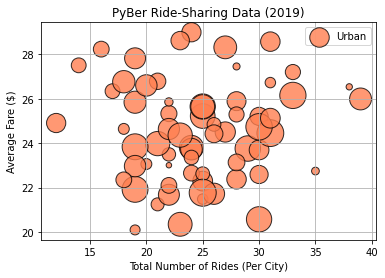

In [28]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

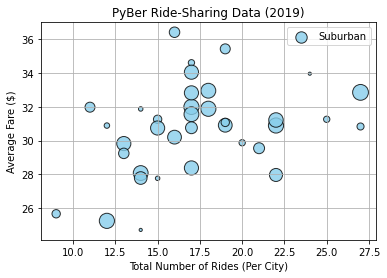

In [29]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

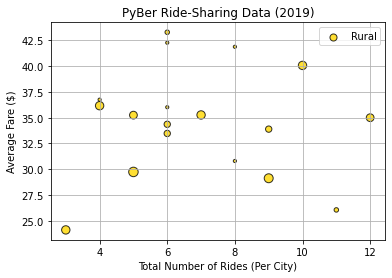

In [30]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

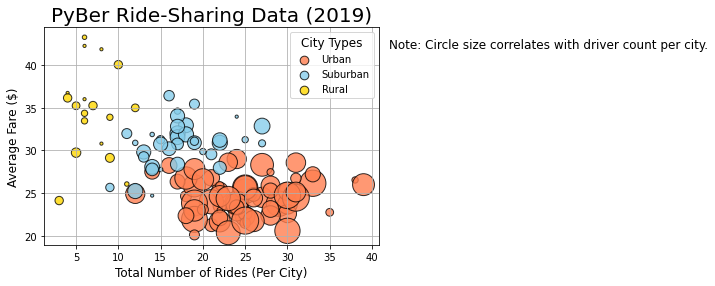

In [43]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
lgnd = plt.legend(fontsize="10",
                  scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 42, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Show the plot
plt.show()

In [44]:
# Save the figure.
plt.savefig("analysis/Fig1.png")

<Figure size 432x288 with 0 Axes>